# Inference Notebook

This is a notebook for plotting the results of the YOLO model using various libraries.

Also take a look at the [bottom](##end_to_end_script) of this notebook for working with the refactored `detect_cards.py` script.

In [30]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import supervision as sv

model = YOLO('weights/poker_best.pt')

## Ultralytics Plot


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 172.7ms
Speed: 16.1ms preprocess, 172.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


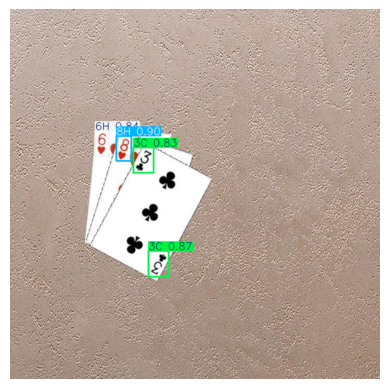

In [31]:
results = model.predict('images/test_img_1.png')
plotted = results[0].plot()
plt.imshow(cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
results[0].summary()

[{'name': '8H',
  'class': 30,
  'confidence': 0.90068,
  'box': {'x1': 205.07497, 'y1': 245.53708, 'x2': 234.10677, 'y2': 293.97763}},
 {'name': '3C',
  'class': 8,
  'confidence': 0.87126,
  'box': {'x1': 267.29996, 'y1': 467.3551, 'x2': 306.85767, 'y2': 517.50262}},
 {'name': '6H',
  'class': 22,
  'confidence': 0.84375,
  'box': {'x1': 164.04195, 'y1': 235.45587, 'x2': 191.12897, 'y2': 284.30307}},
 {'name': '3C',
  'class': 8,
  'confidence': 0.83426,
  'box': {'x1': 238.68631, 'y1': 267.05759, 'x2': 277.56979, 'y2': 316.80734}}]

bad colors!

## Custom CV2 Plot

In [33]:
def plot_boxes(image, results):
    for result in results:
        class_names = result.names  # Add your classes here
        detections = result.boxes.xyxy.numpy()  # Get bounding box coordinates
        confidences = result.boxes.conf.numpy()  # Get confidence scores
        class_ids = result.boxes.cls.numpy().astype(int)  # Get class IDs

        for i in range(len(detections)):
            x1, y1, x2, y2 = map(int, detections[i])  # Convert coordinates to integers
            confidence = confidences[i]
            class_id = class_ids[i]
            class_name = class_names[class_id]

            # Draw the bounding box
            color = (0, 255, 0)  # Green color for the box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Put label with confidence score
            label = f"{class_name} {confidence:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    plt.axis('off')
    plt.imshow(image)
    plt.show()


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 164.5ms
Speed: 4.0ms preprocess, 164.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


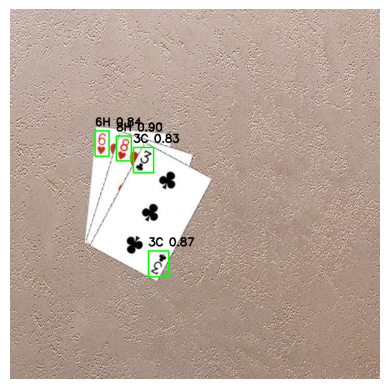

In [34]:
img = cv2.imread('images/test_img_1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model.predict('images/test_img_1.png')
plot_boxes(img, results)

## Supervision Plots

In [35]:
def predict_and_plot(image):
    img = cv2.imread(image)
    model = YOLO('weights/poker_best.pt')
    results = model.predict(image)
    detections = sv.Detections.from_ultralytics(results[0])
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = box_annotator.annotate(
        scene=img.copy(), detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    sv.plot_image(annotated_image)
    plt.show()


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 180.7ms
Speed: 13.9ms preprocess, 180.7ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


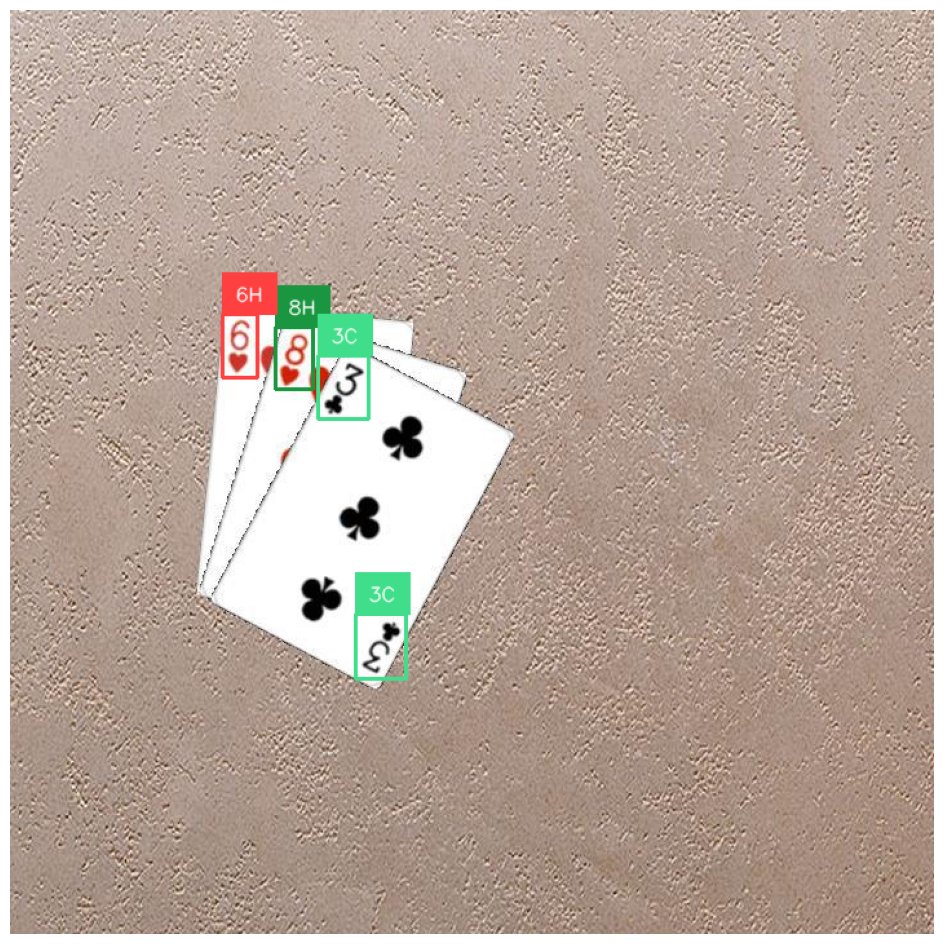


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_2.png: 640x640 1 2C, 1 7H, 2 9Ds, 169.6ms
Speed: 0.0ms preprocess, 169.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


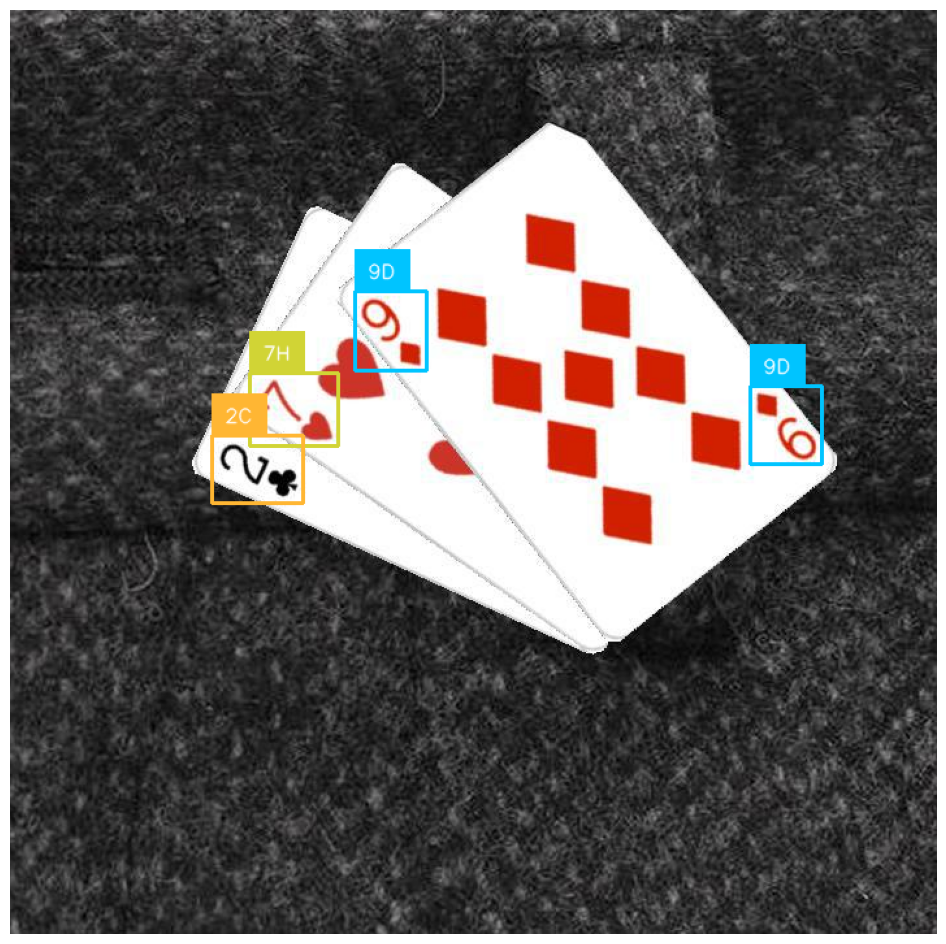


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_3.png: 640x640 1 4H, 1 6D, 2 QDs, 176.3ms
Speed: 5.4ms preprocess, 176.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


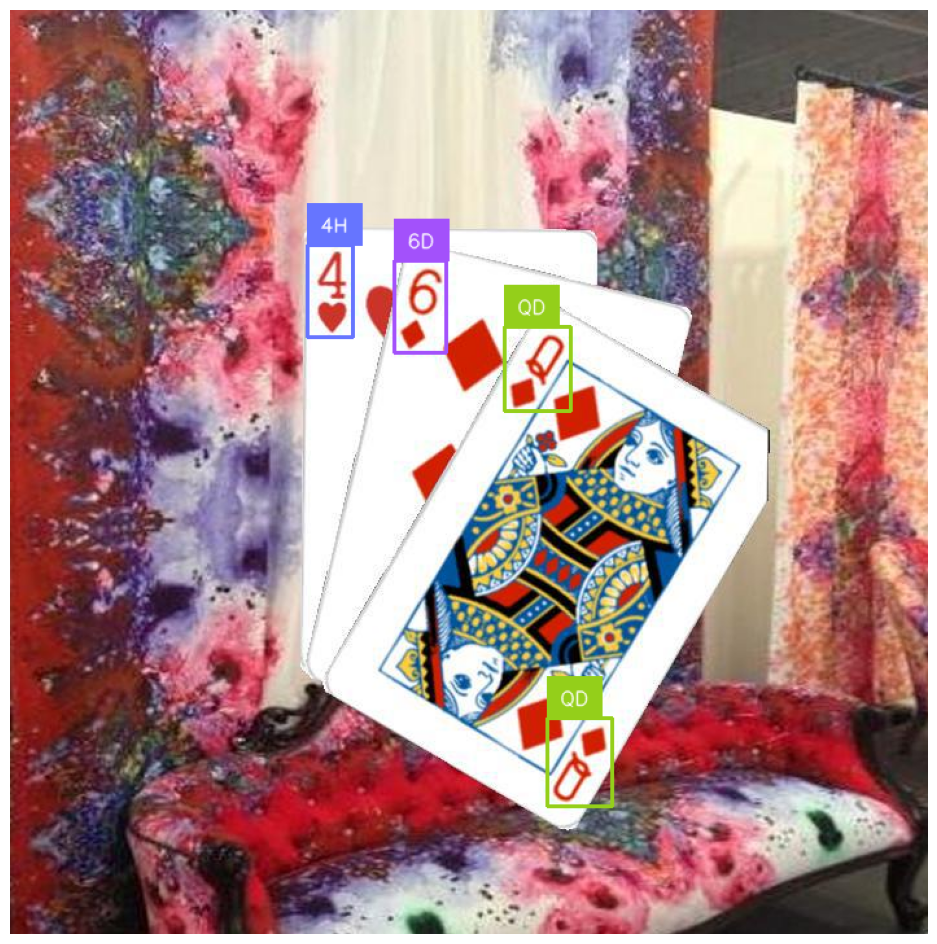

In [36]:
predict_and_plot('images/test_img_1.png')
predict_and_plot('images/test_img_2.png')
predict_and_plot('images/test_img_3.png')

## end_to_end_script 

In [37]:
!python detect_cards.py


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 217.3ms
Speed: 0.0ms preprocess, 217.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
6 of Hearts
8 of Hearts
3 of Clubs

image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_2.png: 640x640 1 2C, 1 7H, 2 9Ds, 166.7ms
Speed: 0.0ms preprocess, 166.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
2 of Clubs
7 of Hearts
9 of Diamonds

image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_3.png: 640x640 1 4H, 1 6D, 2 QDs, 178.3ms
Speed: 16.4ms preprocess, 178.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
4 of Hearts
6 of Diamonds
Queen of Diamonds


In [46]:
from detect_cards import detect_cards
from detect_cards import decode_cards

# Test on the first image
image_path = 'images/test_img_1.png'
weights_path = 'weights/poker_best.pt'
cards = detect_cards(image_path, weights_path)
print(f"\nNumber of cards detected: {len(cards)}")
print(f"Cards sorted from left to right: {cards}")
print("\n".join(decode_cards(cards)))


image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 157.2ms
Speed: 8.7ms preprocess, 157.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

Number of cards detected: 3
Cards sorted from left to right: ['6H', '8H', '3C']
6 of Hearts
8 of Hearts
3 of Clubs


## Export to onnx and compare

In [47]:
model.export(format='onnx')

Ultralytics 8.3.49  Python-3.10.11 torch-2.5.1+cpu CPU (Intel Core(TM) i7-4930K 3.40GHz)

PyTorch: starting from 'weights\poker_best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success  2.9s, saved as 'weights\poker_best.onnx' (10.1 MB)

Export complete (3.4s)
Results saved to G:\pgming\yolo11-poker-hand-detection\weights
Predict:         yolo predict task=detect model=weights\poker_best.onnx imgsz=640  
Validate:        yolo val task=detect model=weights\poker_best.onnx imgsz=640 data=/content/Playing-Cards-4/data.yaml  
Visualize:       https://netron.app


'weights\\poker_best.onnx'

In [3]:
from detect_cards import detect_cards
from detect_cards import decode_cards

# Test on the first image
image_path = 'images/test_img_1.png'
weights_path = 'weights/poker_best.onnx'
cards = detect_cards(image_path, weights_path)
print(f"\nNumber of cards detected: {len(cards)}")
print(f"Cards sorted from left to right: {cards}")
print("\n".join(decode_cards(cards)))

Loading weights\poker_best.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 g:\pgming\yolo11-poker-hand-detection\images\test_img_1.png: 640x640 2 3Cs, 1 6H, 1 8H, 111.9ms
Speed: 5.0ms preprocess, 111.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

Number of cards detected: 3
Cards sorted from left to right: ['6H', '8H', '3C']
6 of Hearts
8 of Hearts
3 of Clubs
